##  KNN K近邻算法
最近在看论文的时候看到KNN算法，作为经典的机器学习算法，所以必须学起来。

In [1]:
#导入数据集 
# 学习算法的过程中使用的经典的数据集 鸢尾花分类数据集

#获取数据集
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
#加载鸢尾花数据
datas = load_iris()
#利用切片收集150组鸢尾花数据(datas['data']表示datas的‘data’key值对应的数据，即鸢尾花的花瓣花萼数据)
x_data = datas['data'][0:150]
#表示鸢尾花源数据的类别，0代表setosa,1代表versicolor,2代表virginica（K-NN算法处理基于监督学习的分类问题）
#datas['target']表示datas的‘target’key值对应的数据，即鸢尾花的类别（标签）
y_data = datas['target'][0:150]


In [2]:
x_data.shape  #查看数据情况

(150, 4)

In [3]:
##使用sklearn中的划分数据集函数
from sklearn.model_selection import train_test_split
## 
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,random_state=0)


In [4]:
X_train.shape

(112, 4)

In [ ]:
import math
import csv
import operator
import random
import numpy as np
from sklearn.datasets import make_blobs
 
#Python version 3.6.5
 
# 生成样本数据集 samples(样本数量) features(特征向量的维度) centers(类别个数)
def createDataSet(samples=100, features=2, centers=2):
    return make_blobs(n_samples=samples, n_features=features, centers=centers, cluster_std=1.0, random_state=8)
 
# 加载鸢尾花卉数据集 filename(数据集文件存放路径)
def loadIrisDataset(filename):
    with open(filename, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
        return dataset
    
# 拆分数据集 dataset(要拆分的数据集) split(训练集所占比例) trainingSet(训练集) testSet(测试集)
def splitDataSet(dataSet, split, trainingSet=[], testSet=[]):
    for x in range(len(dataSet)):
        if random.random() <= split:
            trainingSet.append(dataSet[x])
        else:
            testSet.append(dataSet[x])
# 计算欧氏距离 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
# 选取距离最近的K个实例
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
#  获取距离最近的K个实例中占比例较大的分类
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
# 计算准确率
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0
 
 
def main():
    # 使用自定义创建的数据集进行分类
    # x,y = createDataSet(features=2)
    # dataSet= np.c_[x,y]
    
    # 使用鸢尾花卉数据集进行分类

    
    predictions = []
    k = 7
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('>predicted=' + repr(result) + ',actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
main()
    

<ipython-input-5-f6db9e94ecd5>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)


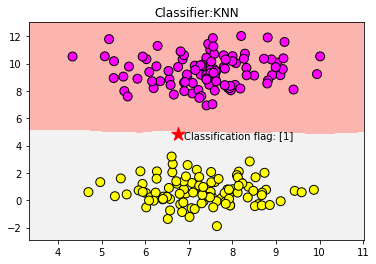

In [5]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为200，分类数为2的数据集
data=make_blobs(n_samples=200, n_features=2,centers=2, cluster_std=1.0, random_state=8)
X,Y=data
 
# 将生成的数据集进行可视化
# plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
# plt.show()
 
clf = KNeighborsClassifier()
clf.fit(X,Y)
 
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
plt.scatter(6.75,4.82,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[6.75,4.82]])
plt.text(6.9,4.5,'Classification flag: '+str(res))
 
plt.show()

<ipython-input-6-a10098c22d8b>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)


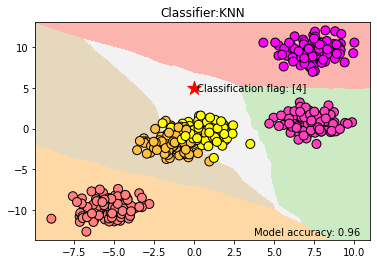

In [6]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为500，分类数为5的数据集
data=make_blobs(n_samples=500, n_features=2,centers=5, cluster_std=1.0, random_state=8)
X,Y=data
 
# 将生成的数据集进行可视化
# plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
# plt.show()
 
clf = KNeighborsClassifier()
clf.fit(X,Y)
 
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
plt.scatter(0,5,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[0,5]])
plt.text(0.2,4.6,'Classification flag: '+str(res))
plt.text(3.75,-13,'Model accuracy: {:.2f}'.format(clf.score(X, Y)))
 
plt.show()

<ipython-input-8-e3d412bf14dc>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(z,reg.predict(z),c='k',Linewidth=3)


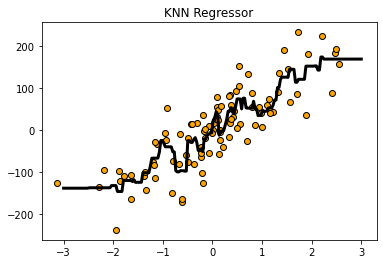

In [8]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
 
# 导入用于回归分析的KNN模型
from sklearn.neighbors import KNeighborsRegressor
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 导入数据集生成器
from sklearn.datasets import make_regression
from docutils.utils.math.math2html import LineWriter
 
# 生成样本数为200，分类数为2的数据集
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,noise=50,random_state=8)
 
# 将生成的数据集进行可视化
# plt.scatter(X,Y,s=80, c='orange',  cmap=plt.cm.spring, edgecolors='k')
# plt.show()
reg = KNeighborsRegressor(n_neighbors=5)
 
reg.fit(X,Y)
 
# 将预测结果用图像进行可视化
z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,Y,c='orange',edgecolor='k')
plt.plot(z,reg.predict(z),c='k',Linewidth=3)
#
plt.title("KNN Regressor")
 
plt.show()

<ipython-input-9-f6db9e94ecd5>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)


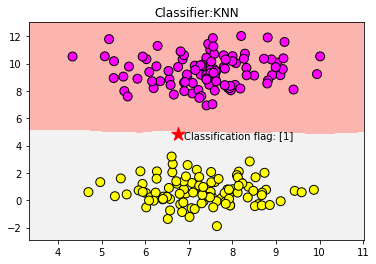

In [9]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为200，分类数为2的数据集
data=make_blobs(n_samples=200, n_features=2,centers=2, cluster_std=1.0, random_state=8)
X,Y=data
 
# 将生成的数据集进行可视化
# plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
# plt.show()
 
clf = KNeighborsClassifier()
clf.fit(X,Y)
 
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
plt.scatter(6.75,4.82,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[6.75,4.82]])
plt.text(6.9,4.5,'Classification flag: '+str(res))
 
plt.show()

In [15]:
#进行预测

Y_predict = clf.predict([[4,5]])
Y_predict

array([1])